In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Airline_Dataset.csv')

# Set up visualization style
sns.set(style="whitegrid")

# Gender Distribution

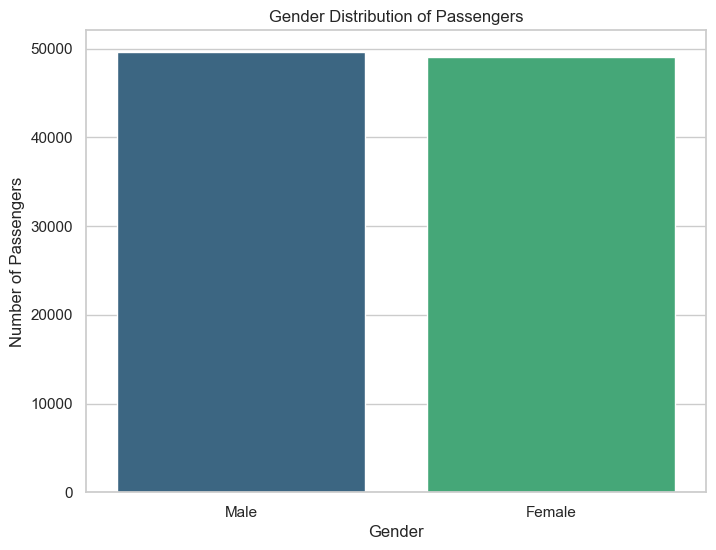

In [2]:
# Gender distribution
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
plt.title('Gender Distribution of Passengers')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

# Age Distribution

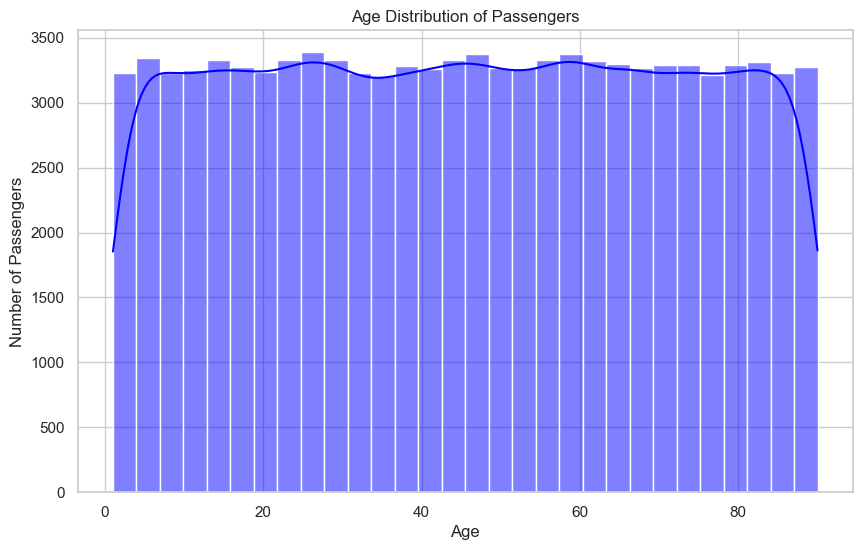

In [3]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

# Nationality Distribution (Top 10)

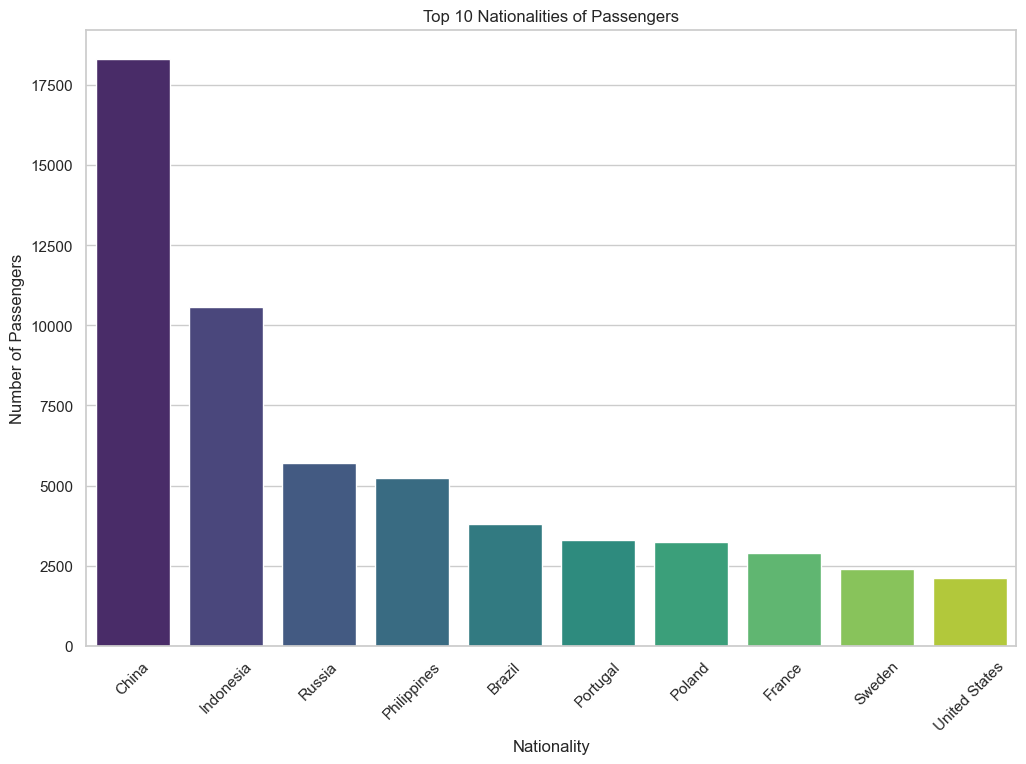

In [4]:
# Nationality distribution (Top 10)
nationality_counts = data['Nationality'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=nationality_counts.index, y=nationality_counts.values, palette="viridis")
plt.title('Top 10 Nationalities of Passengers')
plt.xlabel('Nationality')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.show()

# Age Groups - Gender wise

<Figure size 1400x800 with 0 Axes>

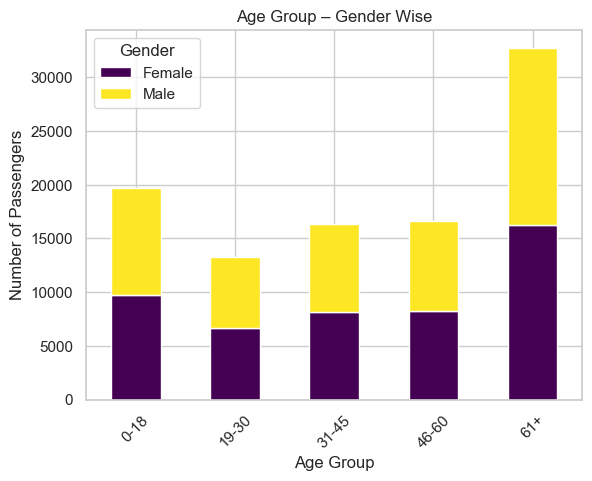

In [5]:
# Define age groups
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Count the number of passengers in each age group and gender
age_gender_counts = data.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
age_gender_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Age Group – Gender Wise')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.show()

# Filter Pane for Genders (M/F)

In [6]:
import plotly.express as px
import plotly.graph_objects as go

# Create a filtered dataframe
def filter_gender(gender):
    return data[data['Gender'] == gender]

# Create a dropdown menu for gender selection
fig = go.Figure()

# Add traces for Male and Female
for gender in ['Male', 'Female']:
    filtered_data = filter_gender(gender)
    age_gender_counts = filtered_data.groupby(['Age Group']).size()
    fig.add_trace(go.Bar(x=age_gender_counts.index.astype(str), y=age_gender_counts.values, name=gender))

# Update layout
fig.update_layout(
    title='Age Group – Gender Wise',
    xaxis_title='Age Group',
    yaxis_title='Number of Passengers',
    barmode='group',
    updatemenus=[{
        'buttons': [
            {
                'method': 'update',
                'label': 'Male',
                'args': [{'visible': [True, False]}, {'title': 'Age Group – Male'}]
            },
            {
                'method': 'update',
                'label': 'Female',
                'args': [{'visible': [False, True]}, {'title': 'Age Group – Female'}]
            },
            {
                'method': 'update',
                'label': 'Both',
                'args': [{'visible': [True, True]}, {'title': 'Age Group – Gender Wise'}]
            }
        ],
        'direction': 'down',
        'showactive': True,
    }]
)

fig.show()